# 🎯 Taller Support Vector Machines

**📅 Fecha:** 2025  
**👤 Equipo:** [Marcela Fajardo Bermúdez - Hector Hernan Betancourt Lopez]

## Support Vector Machines

SVMs are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm. To tell the SVM story, we’ll need to first talk about margins and the idea of separating data with a large “gap.” Next, we’ll talk about the optimal margin classifier, which will lead us into a digression on Lagrange duality. We’ll also see kernels, which give a way to apply SVMs efficiently in very high dimensional (such as infinite-
dimensional) feature spaces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

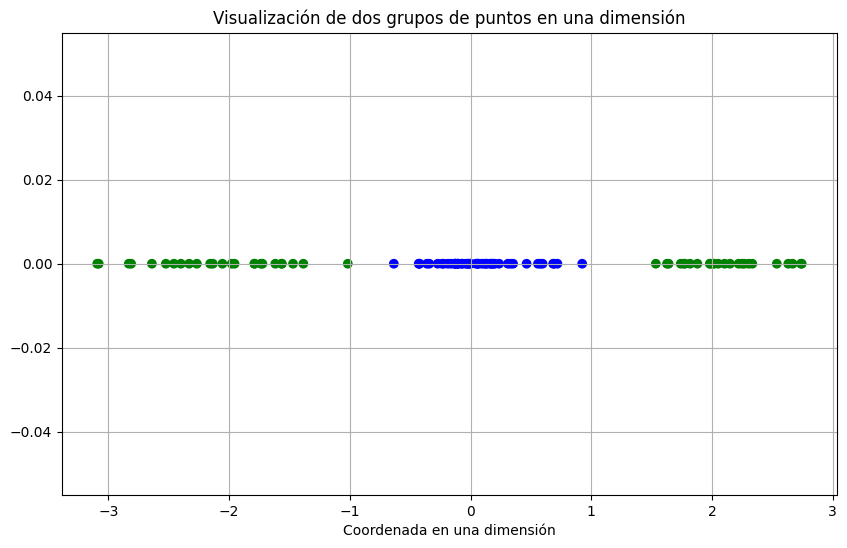

In [2]:
# Generar puntos para el grupo 1 en la parte central
group1 = np.random.normal(loc=0, scale=0.5, size=50)
# Generar puntos para el grupo 2 a los lados del grupo 1
group2 =np.hstack( (np.random.normal(loc=-2, scale=0.5, size=25), np.random.normal(loc=2, scale=0.5, size=25)))
# Concatenar los puntos de los dos grupos
points = np.concatenate([group1, group2])
# Etiquetas para los puntos
labels = np.concatenate([np.zeros(50), np.ones(50)])
# Colores para los puntos según sus etiquetas
colors = {0: 'blue', 1: 'green'}
# Visualización de los puntos en una sola dimensión
plt.figure(figsize=(10, 6))
plt.scatter(points, np.zeros_like(points), c=[colors[label] for label in labels], marker='o')
plt.title('Visualización de dos grupos de puntos en una dimensión')
plt.xlabel('Coordenada en una dimensión')

plt.grid(True)



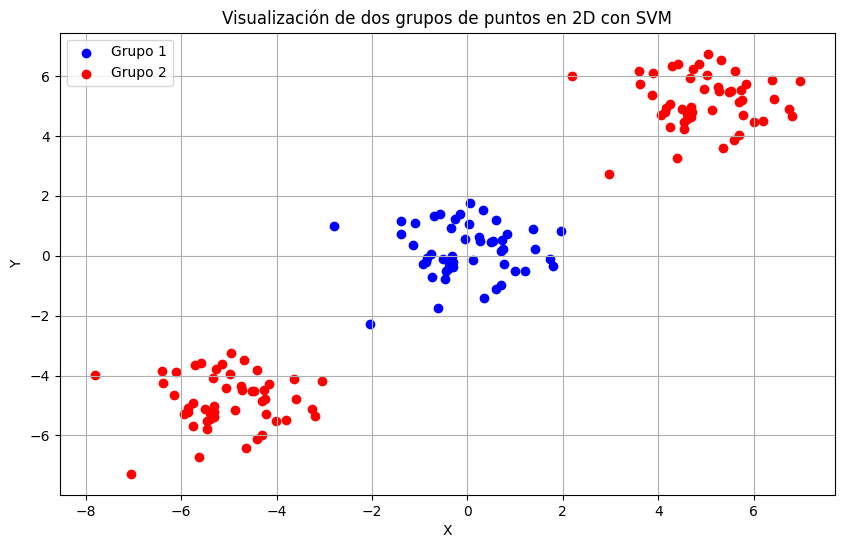

In [3]:
# Generar puntos del grupo 1 en el centro
center_points = np.random.randn(50, 2)

# Generar puntos del grupo 2 a los lados
side_points1 = center_points + np.array([5, 5])
side_points2 = center_points + np.array([-5, -5])

# Combinar los puntos de ambos grupos
X = np.vstack([center_points, side_points1, side_points2])
y = np.hstack([np.zeros(50), np.ones(50), np.ones(50) * 2])
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.show()


## Experiment 1: let's try a linear kernel

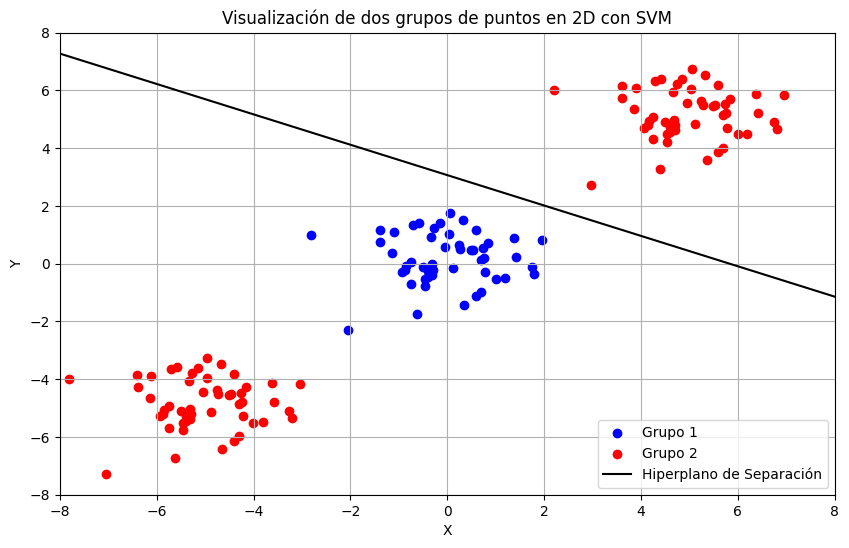

In [4]:
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Obtener el hiperplano de separación
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot del hiperplano de separación
plt.plot(xx, yy, 'k-', label='Hiperplano de Separación')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.axis([-8,8,-8,8])
plt.show()

## Exercise 1
lets implement the Gaussian kernel

Given two data examples, $(x^i,y^i)$ and $(x^j,y^j)$, where the input vectors $x$ have $n$ features. The Gaussian kernel is defined as:


$K(x^i,x^j)= exp(-\frac{|x^i-x^j|^2}{2\sigma^ 2}) = exp(-\frac{\sum_{k=1} ^ n (x^i _k-x^j _k)^2}{2\sigma^2})$


Parameter $\sigma$ controls the decay speed as the vectors $x^i$ and $x^j$ go appart.

### Your task
Implement a  function to compute the Gaussian Kernel, it should receive two feature vectors and a parameter $\sigma$


Once you’ve completed the function gaussianKernel, the next cell  will test your kernel function on two provided examples and you should expect to see a value of:

    1. 0.6669768108584743   if the input is one dimensional
    2. 0.5352614285189903  if the input is two dimensional
    
You must explore how does it affect the value of $\sigma$ when there are points close toguether or far appart.

#### Se define la función gaussian

* El parámetro sigma (σ) en el kernel gaussiano de SVM controla "cuánto" se considera que dos puntos de entrada son similares dependiendo de su distancia.

* Se calcula una medida de similitud o cercanía entre dos puntos x1 y x2

In [5]:
def gaussianKernel(x1, x2, sigma):
    diferencia = x1 - x2
    sq_norm = np.dot(diferencia, diferencia)
    k = np.exp(-sq_norm / (2 * sigma**2))
    return k

* Se explora el efecto del sigma, utilizando los valores de X1 y X2 definidos previamente en el taller

In [6]:
x1 = -2.1
x2 = -1.2
sigma_valores = [0.5, 1, 3, 5, 10, 15, 20,30, 50]

for sigma in sigma_valores:
    K = gaussianKernel(x1, x2, sigma)
    print('one dimension:', f'sigma= {sigma}, kernel= {K}')

print("="*40)

x1D = np.array([1, 1])
x2D = np.array([1.5, 2])
for sigma in sigma_valores:
    KD = gaussianKernel(x1D, x2D, sigma)
    print('two dimension:', f'sigma= {sigma}, kernel= {KD}')

one dimension: sigma= 0.5, kernel= 0.19789869908361457
one dimension: sigma= 1, kernel= 0.6669768108584743
one dimension: sigma= 3, kernel= 0.9559974818330998
one dimension: sigma= 5, kernel= 0.9839305142725083
one dimension: sigma= 10, kernel= 0.9959581901895135
one dimension: sigma= 15, kernel= 0.9982016190284373
one dimension: sigma= 20, kernel= 0.9989880124051737
one dimension: sigma= 30, kernel= 0.9995501012348142
one dimension: sigma= 50, kernel= 0.9998380131212914
two dimension: sigma= 0.5, kernel= 0.0820849986238988
two dimension: sigma= 1, kernel= 0.5352614285189903
two dimension: sigma= 3, kernel= 0.9329119603871474
two dimension: sigma= 5, kernel= 0.9753099120283326
two dimension: sigma= 10, kernel= 0.9937694906233947
two dimension: sigma= 15, kernel= 0.9972260766771478
two dimension: sigma= 20, kernel= 0.9984387200675904
two dimension: sigma= 30, kernel= 0.9993057966262922
two dimension: sigma= 50, kernel= 0.999750031247396


* Se explora el efecto del sigma, utilizando diferentes valores de X1 y X2, tanto para valores cercanos como lejanos

In [7]:
# Explorar el efecto de sigma para puntos cercanos
x_close1 = 1
x_close2 = 1.1

print("Explorando sigma para puntos cercanos:")
for sigma in sigma_valores:
    k_close = gaussianKernel(x_close1, x_close2, sigma)
    print(f"sigma = {sigma}, Valor del Kernel = {k_close}")

print("\nExplorando sigma para puntos lejanos:")

# Explorar el efecto de sigma para puntos lejanos
x_far1 = 1
x_far2 = 5
for sigma in sigma_valores:
    k_far = gaussianKernel(x_far1, x_far2, sigma)
    print(f"sigma = {sigma}, Valor del Kernel = {k_far}")


Explorando sigma para puntos cercanos:
sigma = 0.5, Valor del Kernel = 0.9801986733067553
sigma = 1, Valor del Kernel = 0.9950124791926823
sigma = 3, Valor del Kernel = 0.9994445987368581
sigma = 5, Valor del Kernel = 0.9998000199986667
sigma = 10, Valor del Kernel = 0.9999500012499791
sigma = 15, Valor del Kernel = 0.9999777780246896
sigma = 20, Valor del Kernel = 0.9999875000781246
sigma = 30, Valor del Kernel = 0.9999944444598765
sigma = 50, Valor del Kernel = 0.999998000002

Explorando sigma para puntos lejanos:
sigma = 0.5, Valor del Kernel = 1.2664165549094176e-14
sigma = 1, Valor del Kernel = 0.00033546262790251185
sigma = 3, Valor del Kernel = 0.41111229050718745
sigma = 5, Valor del Kernel = 0.7261490370736909
sigma = 10, Valor del Kernel = 0.9231163463866358
sigma = 15, Valor del Kernel = 0.9650691177896804
sigma = 20, Valor del Kernel = 0.9801986733067553
sigma = 30, Valor del Kernel = 0.9911505004882849
sigma = 50, Valor del Kernel = 0.9968051145430329


#### **Interpretación:**

Con los resultados obtenidos, se observa que la variación del parámetro sigma afecta el valor de la función kernel gaussiana.

* Cuando los puntos son cercanos, el valor del kernel es alto para cualquier sigma, pero mientras más pequeño sea sigma, el valor disminuye ligeramente.

  A medida que aumenta sigma, el valor del kernel tiende rápidamente a 1, reflejando que para valores grandes de sigma, casi todos los puntos parecen similares para el kernel.

* Cuando los puntos son lejanos, el valor del kernel es muy pequeño si sigma es pequeño, aunque aumenta a medida que sigma crece.


## Exercise 2
We will begin by with a 2D example dataset which can be separated by a linear boundary. The script will plot the training data. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.


In [8]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

The next part in run the SVM training (with C = 1) using SVM software that I have included with the starter code,
When C = 1, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left.

#### Your task
Your task is to try different values of C on this dataset. Specifically, you should change the value of C in the script to C = 100 and run the SVM training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
#cargar dataset1
data=np.loadtxt('C:/Users/1061736201/OneDrive - Universidad Icesi/Documentos/Fundamentos_Analitica/dataset1.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)

* Se prueban diferentes valores C a través de un ciclo for

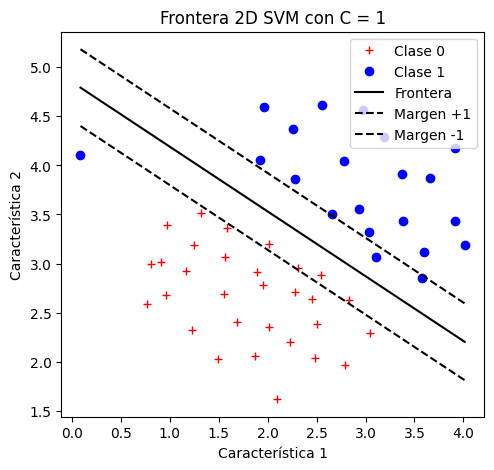

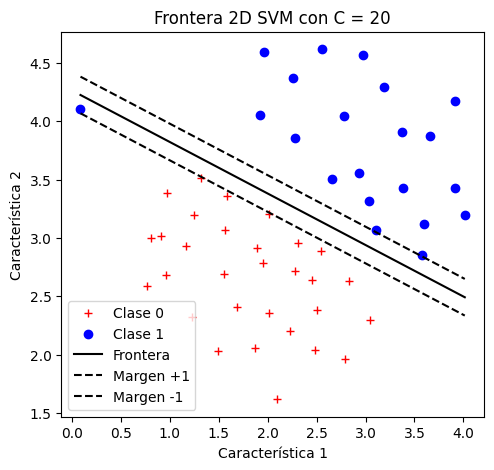

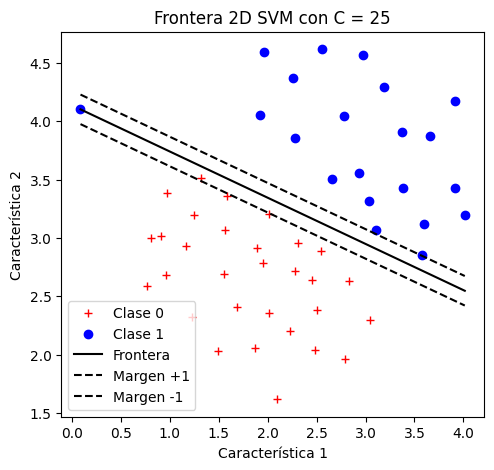

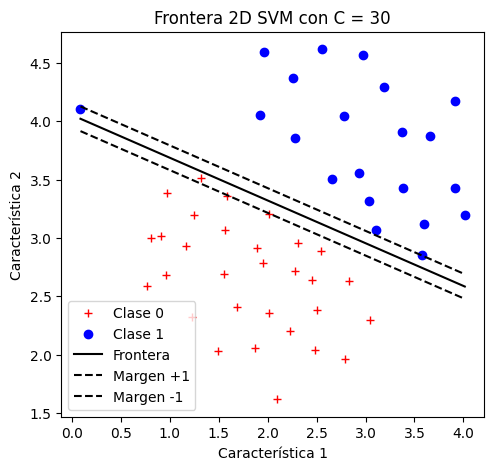

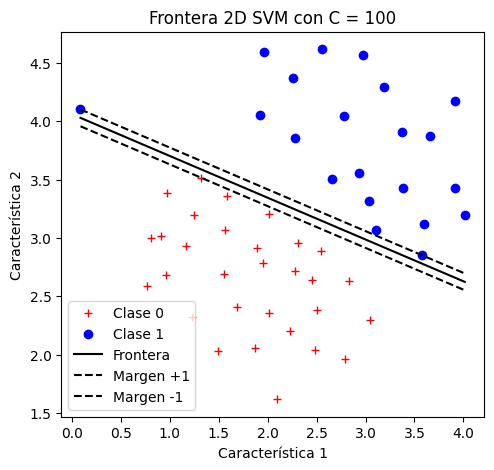

In [11]:
C_valores = [1 , 20, 25, 30, 100]
for c in C_valores:
    clf_lin = svm.SVC(kernel='linear', C=c)
    # Ajustar las dimensiones de Y si es necesario
    # Si Y tiene forma (n,) y X tiene (n, m), no hay problema.
    # Si Y tiene forma (n, 1), conviértelo a (n,)
    if Y.ndim == 2 and Y.shape[1] == 1:
        Y = Y.ravel()
    clf_lin.fit(X, Y)

    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.title(f'Frontera 2D SVM con C = {c}')
    plt.plot(X[Y==0, 0], X[Y==0, 1], '+r', label='Clase 0')
    plt.plot(X[Y==1, 0], X[Y==1, 1], 'ob', label='Clase 1')

    # Cálculo de hiperplano y márgenes
    w = clf_lin.coef_[0]
    b = clf_lin.intercept_[0]
    a = -w[0]/w[1]
    xx = np.linspace(X[:, 0].min(), X[:, 0].max())

    # Frontera central
    yy = a * xx - b / w[1]
    # Márgenes (modificando el término independiente)
    margin = 1 / np.linalg.norm(w)
    yy_down = yy + margin
    yy_up = yy - margin

    plt.plot(xx, yy, 'k-', label='Frontera')
    plt.plot(xx, yy_up, 'k--', label='Margen +1')
    plt.plot(xx, yy_down, 'k--', label='Margen -1')
    plt.legend()
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()


#### **Interpretación:**

C es un hiperparámetro de regularización que hace un balance entre maximizar el margen de separación y minimizar el error de clasificación en los datos.

Entre más grande sea el valor del hiperparámetro C, se obtiene un margen estrecho, lo cual lleva a que el modelo busque clasificar correctamente los puntos, incluyendo los valores atípicos. Esto podría generar que el modelo caiga en overfitting.

Entre más pequeño sea el valor del hiperparámetro C, se obtiene un margen más amplio, lo que ocasiona que se clasifique erróneamente algunos puntos, es un modelo con alto sesgo pero menor varianza.

* Para el ejercicio se realizaron pruebas con C=1, C= 20, C=25 , C=30 y C=100 se observa lo siguiente:

* C = 1 El margen es más amplio y clasifica mal el valor atipico. (flexible)
* C = 20 la frontera de decisión clasifica erroneamente el valor atipico.
* C = 25 la frontera de decisión pasa por encima del valor atipico.
* C = 30 la frontera se ajusta de tal manera que clasifica correctamente el punto atípico.
* C = 100 el margen es más estrecho, la frontera se ajusta de tal manera que clasifica correctamente el punto atípico.(estricto)

## Excercise 3
The next part  will load and plot dataset 2. From the plot, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

#### Your task
You should change the parameter gamma, it is associated with the parameter $\sigma$, from the first equation.You should not use values higher than 50.

What is the effect of changing the parameter gamma?

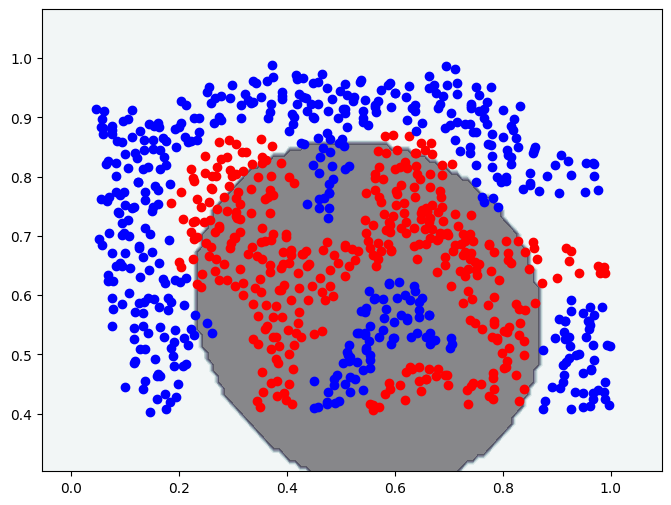

In [12]:
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('C:/Users/1061736201/OneDrive - Universidad Icesi/Documentos/Fundamentos_Analitica/dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 1  # parametro de regularizacion de la svm
gamma= 1 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)



* **Nota:**

La función de base radial (Radial Basis Function, RBF), es una función kernel que mide la similitud entre puntos permitiendo a SVMs realizar clasificaciones no lineales muy efectivas mediante la transformación implícita de los datos a un espacio de características de alta dimensionalidad.

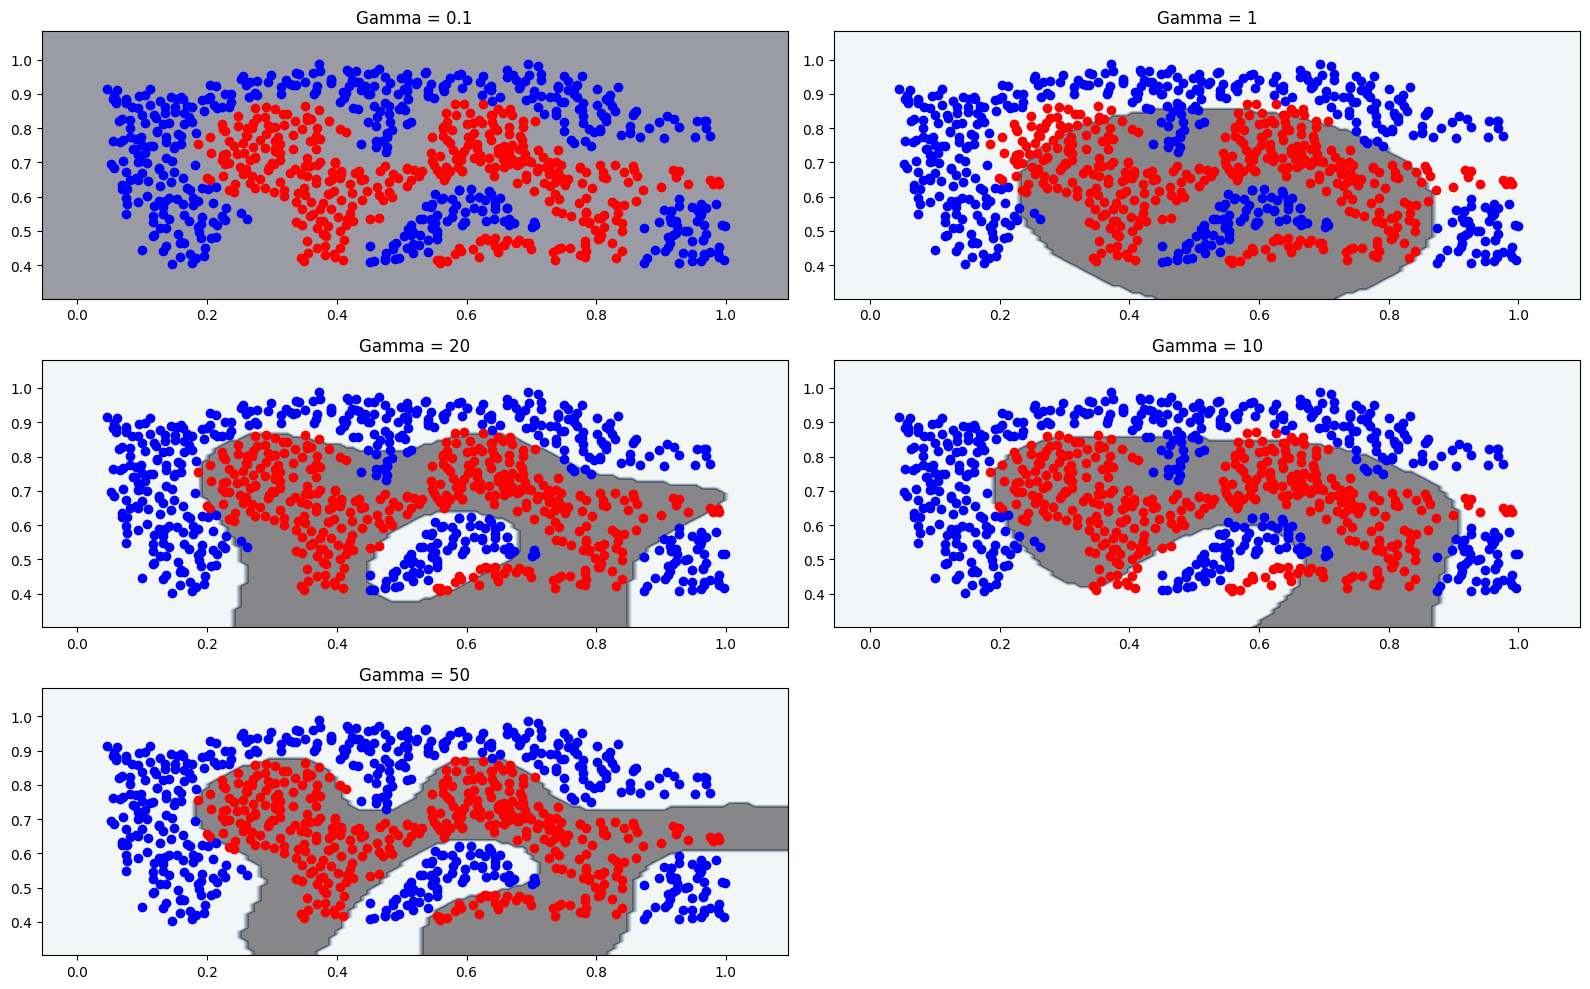

In [13]:
# Explorar el efecto de diferentes valores de gamma
gammas_to_test = [0.1, 1, 20, 10, 50]

plt.figure(figsize=(16, 10))

for i, gamma_val in enumerate(gammas_to_test):
    plt.subplot(3, 2, i + 1) # Cambiado de 2, 2 a 3, 2
    #graficar datos
    plt.plot(X[Y==0,0],X[Y==0,1],'or')
    plt.plot(X[Y==1,0],X[Y==1,1],'ob')

    #create classifiers
    C    = 1  # parametro de regularizacion de la svm
    clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma_val, C=C)
    #entrenar
    clf_rbf.fit(X, Y)

    #graficar frontera
    plot_hyperplane(clf_rbf,X)
    plt.title(f'Gamma = {gamma_val}')

plt.tight_layout()
plt.show()

#### **Interpretación:**

Gamma está relacionado con la influencia o alcance de cada punto de entrenamiento en la frontera de decisión. Mediante gamma, se controla cómo se localiza o dispersa la influencia de los vectores de soporte para construir la frontera.

* Valores pequeños de gamma (alrededor de 0.1 o menor) significa que cada punto de entrenamiento tiene una influencia más amplia en el espacio, resultando en una frontera de decisión más suave y menos compleja.

* Valores grandes de gamma (hasta 50) significa que los puntos de entrenamiento tienen influencia muy localizada, lo que produce una frontera de decisión más compleja, ajustando muy cerca a los puntos de entrenamiento.

Un valor de gamma pequeño podría ayudar a evitar el overfitting, pero si es muy pequeño podriamos caer en underfitting.

### Exercise 4
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next part will load and display a third dataset. You will be using the SVM with the Gaussian kernel with this dataset.

In the provided dataset, data3, you are given the variables X, y, X_test, y_test. The provided code trains the SVM classifier using the training set (X, y) with some initial parameters. Your task is to use the cross validation set X_test, y_test to determine the best C and gamma parameters to use. You should write any additional code necessary to help you search over the parameters C and gamma. For both C and gamma, It is  suggested trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Note that you should try all possible pairs of values for C and gamma (e.g., C = 0.3 and gamma = 0.1). For example, if you try each of the 8 values listed above for C
and for gamma , you would end up training and evaluating (on the cross validation set) a total of 8 x 8 = 64 different models.

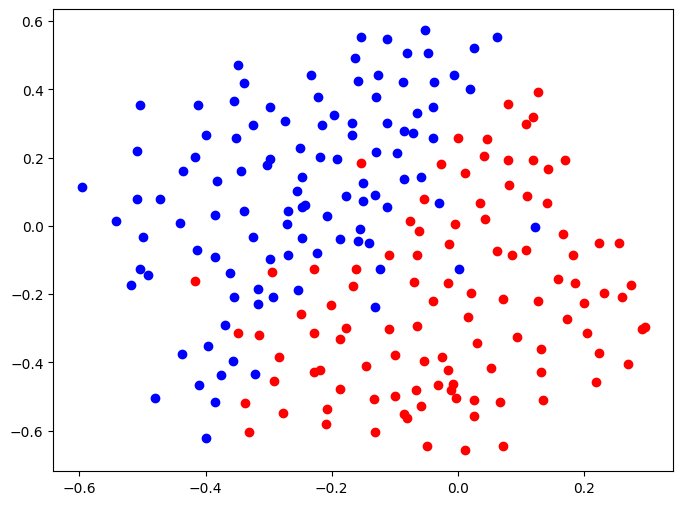

In [14]:
##### Función para graficar el hiperplano
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


##### Se carga el conjunto de datos

#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt("C:/Users/1061736201/OneDrive - Universidad Icesi/Documentos/Fundamentos_Analitica/dataset3_train.data",delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
data=np.loadtxt("C:/Users/1061736201/OneDrive - Universidad Icesi/Documentos/Fundamentos_Analitica/dataset3_test.data",delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)


##### Se grafican los datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')


* La validación con hold-out ocurre exactamente en el momento donde se realiza  la división de los datos en varias partes, utilizando una para entrenar el modelo y el resto para validarlo y probarlo.

Mejores parámetros: C=3.0, gamma=30.0
Precisión en validación: 96.50%


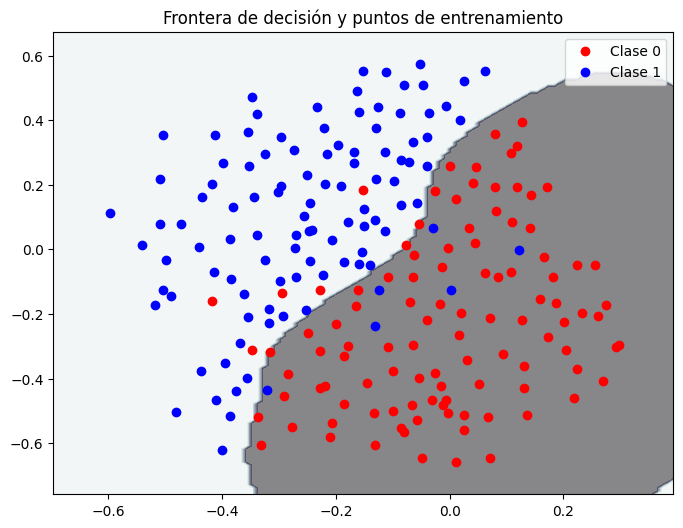

In [15]:
##### Valores de parámetros a probar para regularización y kernel

C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])


############ nuevo código

best_accuracy = 0
best_params = {'C': None, 'gamma': None}
best_clf = None

for c_val in C:
    for g_val in gamma:
        clf = svm.SVC(kernel='rbf', C=c_val, gamma=g_val)
        clf.fit(X, y)
        y_pred = clf.predict(X_test) # Se predice con los datos que NO se usaron para entrenar
        accuracy = (y_test == y_pred).sum() / y_test.size # Se compara contra las etiquetas reales de test
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['C'] = c_val
            best_params['gamma'] = g_val
            best_clf = clf

print(f"Mejores parámetros: C={best_params['C']}, gamma={best_params['gamma']}")
print(f"Precisión en validación: {best_accuracy*100:.2f}%")

# Graficar frontera para el mejor modelo

plt.figure(figsize=(8, 6))           # Crea o activa figura nueva

plot_hyperplane(best_clf, X)         # Dibuja frontera

plt.plot(X[y==0,0], X[y==0,1], 'or', label="Clase 0")  # Dibuja puntos clase 0
plt.plot(X[y==1,0], X[y==1,1], 'ob', label="Clase 1")  # Dibuja puntos clase 1

plt.legend()
plt.title("Frontera de decisión y puntos de entrenamiento")
plt.show()

* A continuación, se realiza el Cross Validation de 5 folds, en este se divide los datos en 5 partes, utilizando 4 para entrenar y 1 para test que se va rotando en cada iteración.

In [16]:
C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])

best_score = 0
best_params = {'C': None, 'gamma': None}

for c_val in C:
    for g_val in gamma:
        clf = svm.SVC(kernel='rbf', C=c_val, gamma=g_val)
        # Validación cruzada sobre el conjunto de entrenamiento (X, y)
        scores = cross_val_score(clf, X, y, cv=5)   # 5-fold CV
        score_mean = scores.mean()
        if score_mean > best_score:
            best_score = score_mean
            best_params['C'] = c_val
            best_params['gamma'] = g_val

print(f"Mejores parámetros con validación cruzada: C={best_params['C']}, gamma={best_params['gamma']}")
print(f"Precisión promedio en validación cruzada: {best_score*100:.2f}%")

Mejores parámetros con validación cruzada: C=30.0, gamma=3.0
Precisión promedio en validación cruzada: 91.95%


Resultados del Grid Search:
C = 0.01, gamma = 0.01, Precisión = 0.4350
C = 0.01, gamma = 0.03, Precisión = 0.4350
C = 0.01, gamma = 0.1, Precisión = 0.4350
C = 0.01, gamma = 0.3, Precisión = 0.4350
C = 0.01, gamma = 1, Precisión = 0.4350
C = 0.01, gamma = 3, Precisión = 0.4350
C = 0.01, gamma = 10, Precisión = 0.4350
C = 0.01, gamma = 30, Precisión = 0.4350
C = 0.03, gamma = 0.01, Precisión = 0.4350
C = 0.03, gamma = 0.03, Precisión = 0.4350
C = 0.03, gamma = 0.1, Precisión = 0.4350
C = 0.03, gamma = 0.3, Precisión = 0.4350
C = 0.03, gamma = 1, Precisión = 0.7950
C = 0.03, gamma = 3, Precisión = 0.8300
C = 0.03, gamma = 10, Precisión = 0.8950
C = 0.03, gamma = 30, Precisión = 0.6900
C = 0.1, gamma = 0.01, Precisión = 0.4350
C = 0.1, gamma = 0.03, Precisión = 0.4350
C = 0.1, gamma = 0.1, Precisión = 0.4650
C = 0.1, gamma = 0.3, Precisión = 0.8150
C = 0.1, gamma = 1, Precisión = 0.8450
C = 0.1, gamma = 3, Precisión = 0.8950
C = 0.1, gamma = 10, Precisión = 0.9250
C = 0.1, gamma = 30, Pre

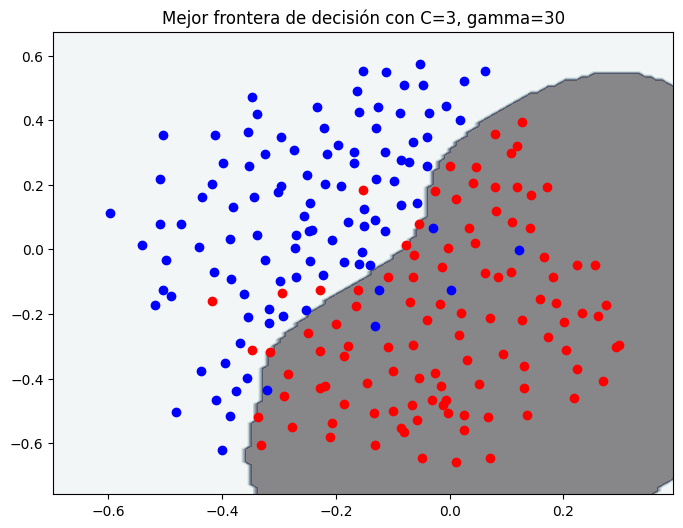

In [17]:
## Se realiza un GridSearchCV de forma manual

best_C = None
best_gamma = None
best_accuracy = 0

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

results = []

for c in C_values:
    for gamma in gamma_values:
        clf_rbf = svm.SVC(kernel='rbf', gamma=gamma, C=c)
        clf_rbf.fit(X, y)
        y_pred = clf_rbf.predict(X_test)
        accuracy = (y_test == y_pred).sum() / y_test.size
        results.append({'C': c, 'gamma': gamma, 'accuracy': accuracy})

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = c
            best_gamma = gamma

print("Resultados del Grid Search:")
for result in results:
    print(f"C = {result['C']}, gamma = {result['gamma']}, Precisión = {result['accuracy']:.4f}")

print(f"\nMejores parámetros encontrados: C = {best_C}, gamma = {best_gamma}")
print(f"Mejor precisión en el conjunto de prueba: {best_accuracy:.4f}")

# Entrenar el modelo final con los mejores parámetros
clf_final = svm.SVC(kernel='rbf', gamma=best_gamma, C=best_C)
clf_final.fit(X, y)

#graficar frontera para el mejor par (C,gamma)
plt.figure(figsize=(8, 6))
plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')
plot_hyperplane(clf_final,X)
plt.title(f'Mejor frontera de decisión con C={best_C}, gamma={best_gamma}')
plt.show()

* A continuación se emplean los mejores valores para C y Gamma generados a partir de los métodos de validación cruzada, se muestran en conjunto con otros para visualizar y comparar.

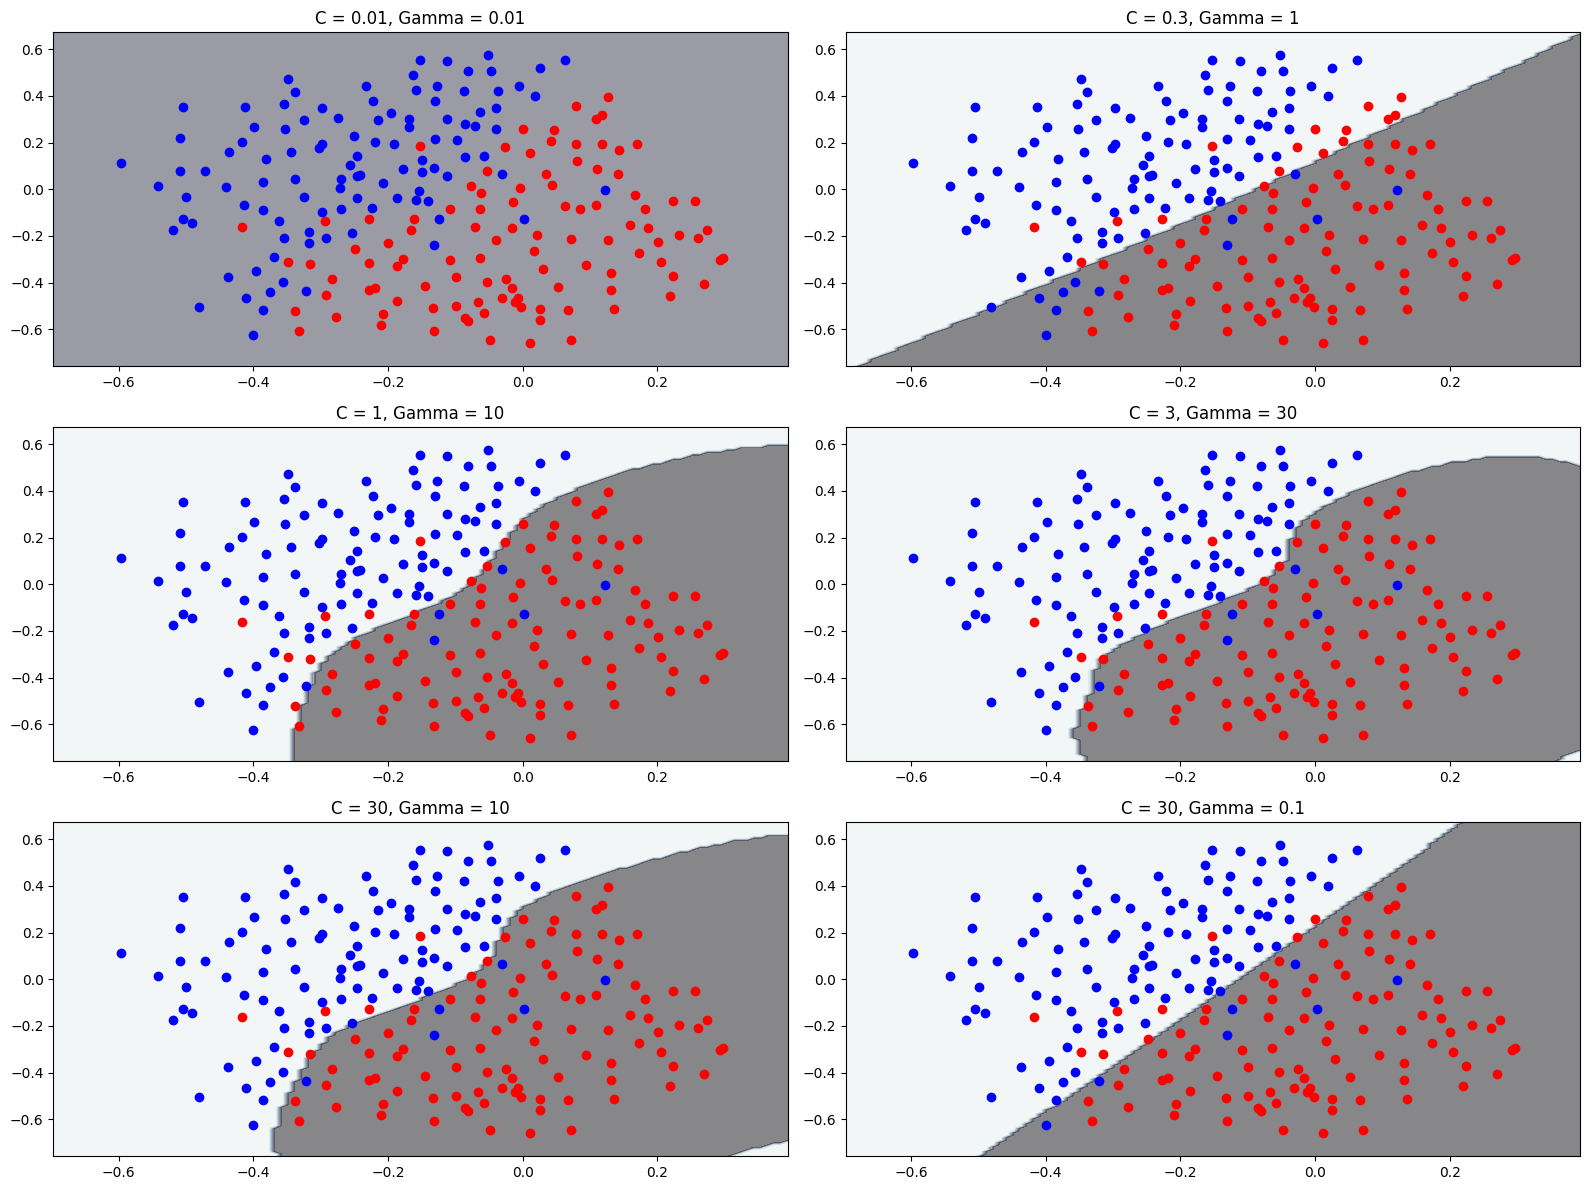

In [18]:
# Seleccionar algunas combinaciones de parámetros para visualizar
# Incluimos la mejor combinación y algunas otras para comparación
param_combinations_to_plot = [
    {'C': 0.01, 'gamma': 0.01}, # Baja C, Baja gamma (bajo rendimiento)
    {'C': 0.3, 'gamma': 1},    # Rendimiento intermedio
    {'C': 1, 'gamma': 10},     # Alto rendimiento
    {'C': 3, 'gamma': 30},     # Mejor rendimiento encontrado (o uno de los mejores)
    {'C': 30, 'gamma': 10},    # Otro de los mejores rendimientos
    {'C': 30, 'gamma': 0.1}    # Alta C, Baja gamma (bajo rendimiento)
]

plt.figure(figsize=(16, 12))

for i, params in enumerate(param_combinations_to_plot):
    c_val = params['C']
    gamma_val = params['gamma']

    plt.subplot(3, 2, i + 1) # Ajustar el grid según el número de combinaciones
    #graficar datos
    plt.plot(X[y==0,0],X[y==0,1],'or')
    plt.plot(X[y==1,0],X[y==1,1],'ob')

    #create classifiers
    clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma_val, C=c_val)
    #entrenar
    clf_rbf.fit(X, y)

    #graficar frontera
    plot_hyperplane(clf_rbf,X)
    plt.title(f'C = {c_val}, Gamma = {gamma_val}')

plt.tight_layout()
plt.show()

## Your conclussions?

Se probaron diversas combinaciones de Valores C y gamma en rangos indicados. Se evaluaron las combinaciones entrenando el modelo SVM con los datos de entrenamiento y viendo su precisión con los datos de prueba. Los mejores valores se obtuvieron con Grid Search con un C= 3 Y GAMMA =30. 